In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("iris_flower.csv")
df
#suppose you dont have labels or colums, what do you do then?
# 1. Create a list names you want your labels to be
# EX. [name] = [name, name, name, name, class]
# 2. pass in names to the colulms while specifying there is no header so that python does not treat the first data row as column names
# Ex. names=[name}, header=none

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Handling Missing Values in a Dataset

There are no missing values here so we dont have to worry about that right now but!.
Missing values are common in real-world datasets.  
It is important to handle them properly to avoid errors and bias in machine learning models.

---

## Methods for Handling Missing Values

1. **Remove Rows with Missing Values**
   - Use when only a few rows have missing data.
   - Example:
     ```python
     df.dropna(inplace=True)
     ```
   - **Pros:** Simple, ensures all data is complete.  
   - **Cons:** Can reduce dataset size and discard potentially useful data.

2. **Remove Columns with Missing Values**
   - Use when a column has many missing entries and is not critical.
   - Example:
     ```python
     df.drop(columns=["column_name"], inplace=True)
     ```
   - **Pros:** Keeps most of the dataset.  
   - **Cons:** Lose all information from that column.

3. **Fill Missing Values with a Constant**
   - Replace missing values with a fixed value (e.g., 0, "Unknown").
   - Example:
     ```python
     df["column_name"].fillna(0, inplace=True)
     ```
   - **Use When:** Missing values are sparse or a default value makes sense.  

4. **Fill with Mean, Median, or Mode**
   - Common for numerical features.
   - Example:
     ```python
     df["column_name"].fillna(df["column_name"].mean(), inplace=True)
     ```
   - **Use When:** Feature is numeric and missing values are random.  

5. **Forward Fill / Backward Fill**
   - Use when data is sequential (time series).
   - Example:
     ```python
     df.fillna(method="ffill", inplace=True)  # forward fill
     df.fillna(method="bfill", inplace=True)  # backward fill
     ```

6. **Predict Missing Values**
   - Use ML models to predict missing values based on other features.
   - Example: regression or KNN imputation.
   - **Use When:** Dataset is large, and missing values are significant but predictable.

7. **Flag Missing Values**
   - Create a new column indicating if a value was missing.
   - Example:
     ```python
     df["column_missing"] = df["column_name"].isna().astype(int)
     ```
   - **Use When:** Missingness itself may carry information.

---

## Tips & Best Practices

- Always **investigate why values are missing** before deciding on a method.  
- Avoid introducing bias when filling missing values.  
- For ML models, **impute only on the training set** and apply the same transformation to validation/test sets.  
- Keep a **record of which columns were imputed**, in case you need to explain your preprocessing steps.

---

**Summary:** Handling missing values carefully ensures your dataset is reliable, improves model performance, and avoids unexpected errors.


In [3]:
df["species"].unique()

<StringArray>
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Length: 3, dtype: str

In [4]:
# ML models require numerical labels, so we convert categorical string classes
# into integers using a mapping. This process is called label encoding.
mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
df["species"] = df["species"].map(mapping)
df["species"].unique()

array([0, 1, 2])

In [5]:
#notice zeros
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


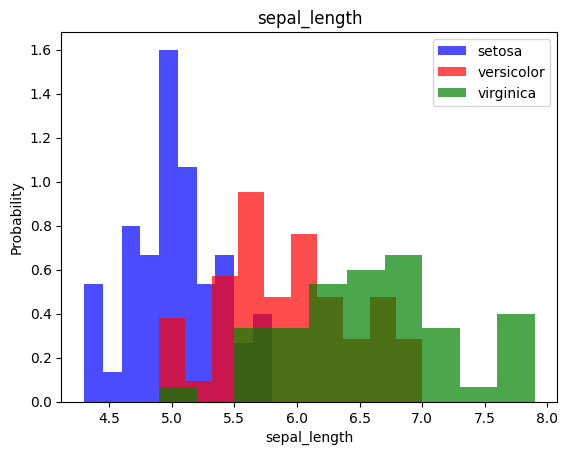

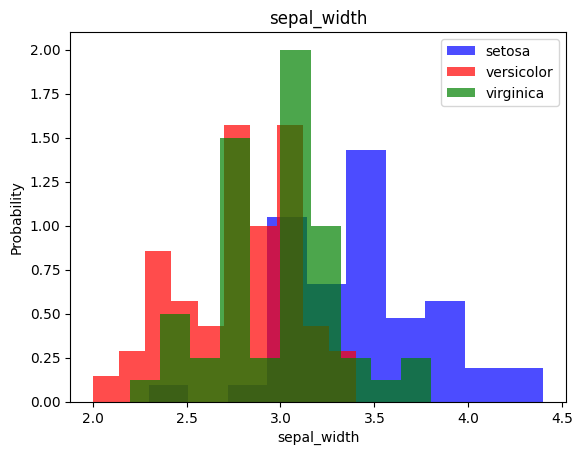

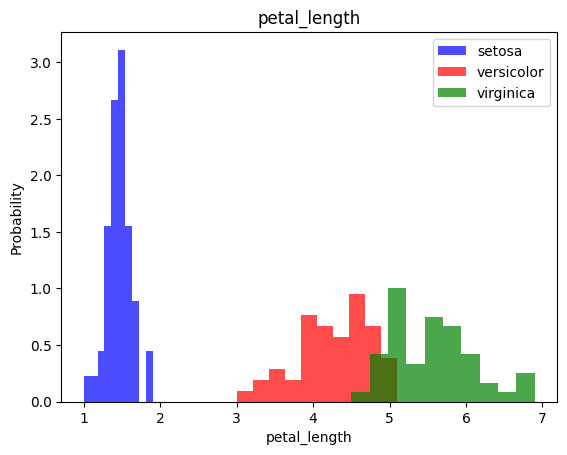

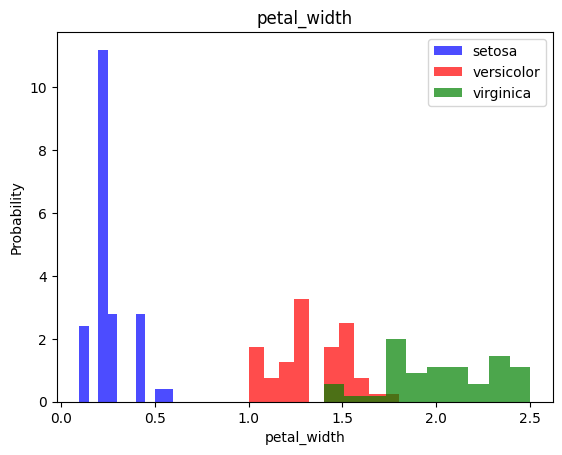

In [41]:
# Loop through each feature column (exclude the last column, which is the label "species")
# Exploratory Data Analysis (EDA):
# We visualize feature distributions for each class to understand how well
# the features separate the classes. Features with clear separation are
# more useful for machine learning models.

for label in df.columns[:-1]:
    # Alternative visualization methods include:
    # - plt.scatter() for comparing two features
    # - seaborn.pairplot() for full feature relationship visualization
    # - box plots for comparing distributions
    
    plt.hist(df[df["species"]==0][label], color="blue", label="setosa", alpha=0.7, density=True)
    plt.hist(df[df["species"]==1][label], color="red", label="versicolor", alpha=0.7, density=True)
    plt.hist(df[df["species"]==2][label], color="green", label="virginica", alpha=0.7, density=True)
    
    plt.title(label)
    # Title shows which feature we are currently analyzing
    
    plt.ylabel("Probability")
    plt.xlabel(label)
    
    # Legend identifies which color corresponds to which species
    plt.legend()
    
    # Show the plot before moving to the next feature
    plt.show()

# Splitting Dataset into Training, Validation, and Test Sets

- `df.sample(frac=1)` randomly shuffles the dataset.  
  This is important because many datasets are ordered by class,  
  and training on ordered data can bias the model.

- `frac=1` means sample 100% of the data (shuffle the entire dataset).

- `np.split` splits the shuffled data into three parts:  
  - 60% training data (used to train the model)  
  - 20% validation data (used to tune model parameters)  
  - 20% test data (used to evaluate final model performance)

- **Tip:** Use `random_state` inside `sample()` to make the split reproducible, e.g.:  
```python
df.sample(frac=1, random_state=42)


In [25]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# Alternate Method for Splitting Dataset

```python
# from sklearn.model_selection import train_test_split

# First, split off 40% of the data into a temporary set
train, temp = train_test_split(df, test_size=0.4, random_state=42)

# Then split the temporary set evenly into validation and test sets
validation, test = train_test_split(temp, test_size=0.5, random_state=42)


# Suppose your dataset has features with very different ranges

Example:  
- `sepal_length = 0.3`  
- `petal_length = 164.6`  

If you train a model directly on this data:  
- Features with larger ranges dominate distance-based calculations  
  (e.g., in KNN, SVM, or gradient descent optimization)  
- Gradient-based models may converge slower  
- Model performance can suffer  

Scaling brings all features to a similar scale, improving model stability and performance.  
Transforms each feature to have mean=0, std=1  
Formula: `(x - mean) / std`  

---

## When to Use Scaling

*(Fit the scaler only on the training set, then transform validation/test)*  

Especially important for:  
- Distance-based models (KNN, SVM with RBF kernel)  
- Gradient-based models (neural networks, logistic regression)  
- PCA (principal component analysis)  

---

## Common Scaling Methods

### 1. Standardization (Z-score scaling)
Transforms each feature to have mean = 0 and standard deviation = 1.  
Formula: `(x - mean) / std`
```python
    from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)  # X is features only
```


### 2. Min-Max Scaling

Scales each feature to a fixed range, usually `[0, 1]`.  
This is useful when you want all features to contribute equally to the model.  
Formula: `(x - min) / (max - min)`

```python
    from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)




In [30]:
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()

    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y

In [31]:
train = pd.DataFrame(train, columns=df.columns)
validation = pd.DataFrame(validation, columns=df.columns)
test = pd.DataFrame(test, columns=df.columns)
print(len(train[train["species"]==0]))
print(len(train[train["species"]==1]))
print(len(train[train["species"]==2]))


#Notice how we have almost perfect symmetry across species
#Sometimes this is not the case
#This is when we use:
#    imblearn.over_sampling import Random_Oversampler
#        - create randomover sampler object
#        - then you will {object}.fit_resample(feature, feature, etc)

32
32
26


In [32]:
train, X_train, y_train = scale_dataset(train)
validation, X_validation, y_validation = scale_dataset(validation)
test, X_test, y_test = scale_dataset(test)

# k - Nearest Neighbors

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [39]:
y_predictions = knn_model.predict(X_test)
y_predictions


array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 2., 1., 2., 1., 0., 2.,
       0., 2., 0., 1., 0., 2., 1., 0., 2., 2., 1., 2., 0.])

In [40]:
y_test

array([0., 1., 0., 0., 0., 2., 1., 1., 2., 0., 0., 2., 1., 2., 1., 0., 2.,
       0., 2., 0., 1., 0., 2., 2., 0., 2., 2., 1., 2., 0.])